# Plotting Q-Learning Hyperparameter Analysis

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output
import gymnasium as gym
import numpy as np
from QLearning import QLearning
from numpy import loadtxt

env = gym.make("Taxi-v3", render_mode='ansi').env

EPISODES = 1500
paramList = [
    r"$\alpha = 0.1$",
    r"$\alpha = 0.45$",
    r"$\alpha = 0.99$",
    r"$\gamma = 0.1$",
    r"$\gamma = 0.5$",
    r"$\gamma = 0.99$",
    r"$\epsilon = 0.9999$",
    r"$\epsilon = 0.5$",
    r"$\epsilon = 0.1$",
]

# https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy
# Totally stole this moving average function, too lazy to debug index offsets and sums.
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

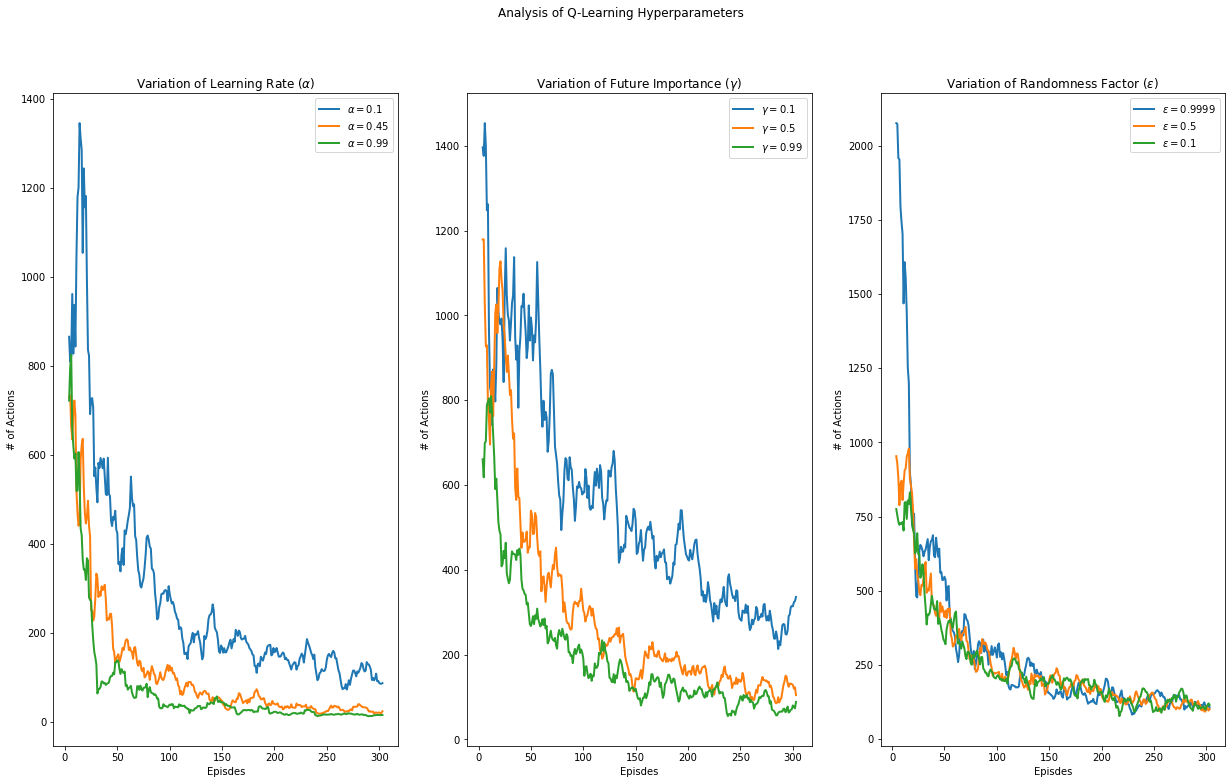

In [40]:
fig = plt.figure(figsize=(21,12))
axList = []
axList.append(fig.add_subplot(1,3,1))
axList.append(fig.add_subplot(1,3,2))
axList.append(fig.add_subplot(1,3,3))
axList[0].set_title(r"Variation of Learning Rate ($\alpha$)")
axList[1].set_title(r"Variation of Future Importance ($\gamma$)")
axList[2].set_title(r"Variation of Randomness Factor ($\epsilon$)")
x = list(range(EPISODES))
window = 300
for i in range(9):
    hist = loadtxt('data/action-history-{}.csv'.format(i))
    # print(hist)
    ax = axList[i//3]
    ax.plot(x[4:-5][:window], moving_average(hist,n=10)[:window],lw=2, label=paramList[i])


for ax in axList:
    ax.set_xlabel("Episodes")
    ax.set_ylabel(r"$\Sigma$ of rewards")
    ax.legend()

fig.suptitle("Analysis of Q-Learning Hyperparameters")

# txt = """The graphs above depict 3 distinct training scenarios each, wherein a single parameter was varied as shown in the captions. These lines are the rolling average, with a window ofAs can be seen in the graphs above, all 3 parameters affect the convergence speed of the algorithm. In this case, all 3 examples still converge, since
# both the observation and actions spaces for the Taxi Driver toy problem are fairly limited. """

"""
The graphs above depict 3 distinct training scenarios each, wherein a single parameter was varied as shown in the captions. The lines are the rolling average, with a window of 10 episodes. As can be observed, all 3 parameters affect the convergence speed of the algorithm. In this case, all 3 examples still converge, since both the observation and action spaces for the Taxi Driver toy problem are fairly limited. When the learning rate is very small, the agent will act mostly randomly at first, since it is unable to update the q-table effectively, although it will eventually learn. A very high alpha might push it toward known solutions too strongly, possibly overwriting previsouly known valid solutions. The consideration for future importance 
"""

# fig.text(.5, .05, txt, ha='center', wrap=True)

fig.savefig("results/analysis.png")